##  1970~2010까지 전세계 테러 현황 조사

- 자료 : https://www.kaggle.com/datasets/START-UMD/gtd?resource=download

### step 1 : 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자 시각화
- 테러는 특정 연도를 기점으로 급격하게 증가한다. 이 구간을 특정짓고 그 "기점"에서 세계적 이슈가 무엇인지 추측

In [1]:
import pandas as pd

In [2]:
# 위 사이트에서 받아온 자료를 불러온다.
Terror_World = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")
Terror_World

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7832\2564791807.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Terror_World = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


- step 1에서 필요한 자료를 먼저 생각해보자. 전체 기간에서 숫자를 연도별로 집계해야함으로 연도별 테러의 총합을 구해야할 것이라 생각된다,

In [3]:
# 자료에서 연도만 가져와 저장한다.
Terror_World_step1 = Terror_World.loc[:, ["iyear"]]
Terror_World_step1

,iyear
0,1970
1,1970
2,1970
3,1970
4,1970
...,...
181686,2017
181687,2017
181688,2017
181689,2017


In [4]:
# 연도별 테러발생 횟수를 구한다.
Terror_World_step1["iyear"].value_counts().head()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: iyear, dtype: int64

In [5]:
# 시각화를 위해 한글폰트 깨짐현상을 방지하기 위한 코드
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


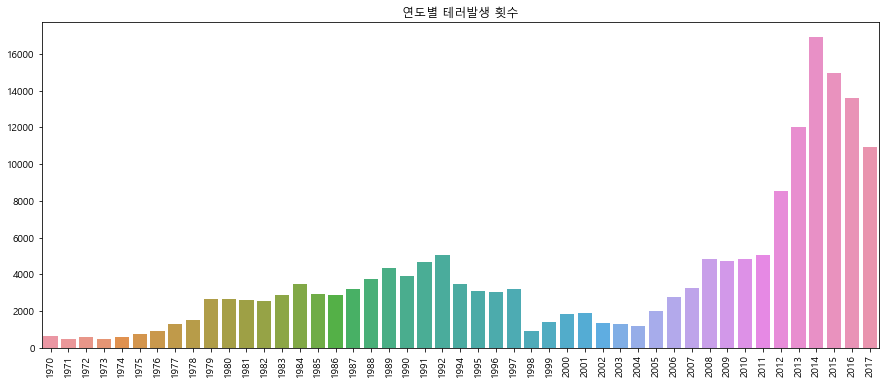

In [6]:
#연도별 테러발생 횟수를 시각화 하는 코드
import seaborn as sns

plt.subplots(figsize=(15,6))
sns.barplot(Terror_World_step1['iyear'].value_counts().index, Terror_World_step1['iyear'].value_counts().values)
plt.xticks(rotation=90)
plt.title('연도별 테러발생 횟수')
plt.show()

- 그래프를 확인한 결과 2012년을 기점으로 테러가 증가하고 있다.
- 그렇다면 2012~2013년도에 어떠한 일이 발생했었는가?


### 나의 추측

- https://namu.wiki/w/iPhone
- 2007년 아이폰을 시작으로 스마트폰이 등장하였음.
- 2008년~2012년까지 스마트폰이 보급되던 시기

- https://catalk.kr/information/worldwide-social-media-users.html
- http://www.inss.re.kr/upload/bbs/BBSA05/202101/F20210125215731169.pdf
- 그와 동시에 등장한 매체가 SNS
- 이슬람 극단주의자들 등은  SNS를 통해 자신들의 체제를 선전하면서 성장했음.

- 그러한 이유로 스마트폰의 보급과 소셜 네트워크의 성장으로 이슬람 극단주의자들의 영향력이 커지며, 그와 동시에 관련 테러가 증가하였다고 예상된다.


## Step 2 : 전세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해 상위 10위의 국가를 시각화

- 국가별로 테러 발생횟수를 저장해야 한다. 연도별 테러의 총합을 구하자.


In [7]:
# 나라이름을 가져온다. 
Terror_World_step2 = Terror_World.loc[:, ["country_txt"]]
Terror_World_step2

,country_txt
0,Dominican Republic
1,Mexico
2,Philippines
3,Greece
4,Japan
...,...
181686,Somalia
181687,Syria
181688,Philippines
181689,India


In [8]:
# 계산 혹은 보여지기 편리하기 위해 컬럼의 이름을 변경한다.
Terror_World_step2.rename(columns={Terror_World_step2.columns[0]: "국가"}, inplace=True)

In [9]:
# 국가가 언급된 횟수를 구한다.
Terror_World_step2["국가"].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: 국가, Length: 205, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


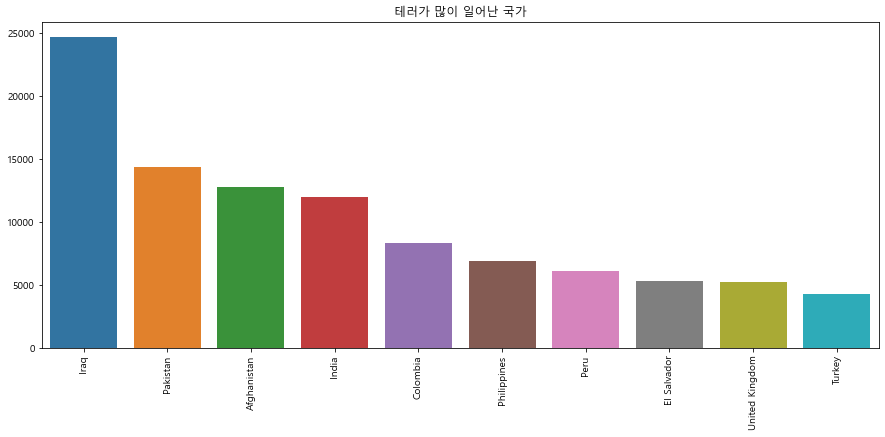

In [10]:
# 그 값을 가지고 상위 10개국을 뽑아내 시각화를 진행한다.
plt.subplots(figsize=(15,6))
sns.barplot(
    Terror_World_step2['국가'].value_counts().index[ :10],
    Terror_World_step2['국가'].value_counts().values[ : 10]
    )
plt.xticks(rotation=90)
plt.title('테러가 많이 일어난 국가')
plt.show()

## Step 3 : 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 사망자 수와 부상자 수를 구분하여 시각화 하시오.
- 어떤 테러횟수와 사상자의 관계를 구해보세요.

In [11]:
# 이 문제를 풀기위해 나라이름, 사망자, 부상자를 가져오자.
Terror_World_step3 = Terror_World.loc[:, ["country_txt", "nkill", "nwound" ]].fillna(0)
Terror_World_step3

,country_txt,nkill,nwound
0,Dominican Republic,1.0,0.0
1,Mexico,0.0,0.0
2,Philippines,1.0,0.0
3,Greece,0.0,0.0
4,Japan,0.0,0.0
...,...,...,...
181686,Somalia,1.0,2.0
181687,Syria,2.0,7.0
181688,Philippines,0.0,0.0
181689,India,0.0,0.0


In [12]:
# 계산 혹은 보여지기 편리하기 위해 컬럼의 이름을 변경한다.
import numpy as np
Terror_World_step3.rename(columns={Terror_World_step3.columns[0]: "국가"}, inplace=True)
Terror_World_step3.rename(columns={Terror_World_step3.columns[1]: "사망자"}, inplace=True)
Terror_World_step3.rename(columns={Terror_World_step3.columns[2]: "부상자"}, inplace=True)

In [13]:
#피벗테이블을 이용하여 국가를 인덱스로 국가별 사상자의 수를 계산한 데이터프레임을 작성한다.
Terror_World_step3 = Terror_World_step3.pivot_table(Terror_World_step3, index=["국가"], aggfunc = [np.sum] )
Terror_World_step3

sum         
                 부상자      사망자
국가                           
Afghanistan  44277.0  39384.0
Albania        126.0     42.0
Algeria       9150.0  11066.0
Andorra          0.0      0.0
Angola        2455.0   3043.0
...              ...      ...
Yemen         9328.0   8776.0
Yugoslavia     281.0    119.0
Zaire          211.0    324.0
Zambia          62.0     70.0
Zimbabwe       222.0    154.0

[205 rows x 2 columns]

In [14]:
#피벗테이블을 사용하면 멀티인덱스 상태가 된다. 이 상태에서 value에 접근하는 방법을 알기 어려워 멀티인덱스를 없애는 코드를 가져왔다.
Terror_World_step3.columns = ['/'.join(col) for col in Terror_World_step3.columns]
Terror_World_step3

,sum/부상자,sum/사망자
국가,,
Afghanistan,44277.0,39384.0
Albania,126.0,42.0
Algeria,9150.0,11066.0
Andorra,0.0,0.0
Angola,2455.0,3043.0
...,...,...
Yemen,9328.0,8776.0
Yugoslavia,281.0,119.0
Zaire,211.0,324.0


In [15]:
# 3번은 국가별 테러횟수와 사상자의 관계를 찾는 것이다. 그렇기에 테러횟수를 데이터프레임으로 저장한다.
Terror_nara=Terror_World_step2["국가"].value_counts().to_frame()
Terror_nara.rename(columns={Terror_nara.columns[0]: "테러횟수"}, inplace=True)
Terror_nara

,테러횟수
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
...,...
International,1
Wallis and Futuna,1
South Vietnam,1
Andorra,1


In [16]:
# 계산 혹은 보여지기 편리하기 위해 컬럼의 이름을 변경한다.
Terror_World_step3.rename(columns={Terror_World_step3.columns[0]: "부상자"}, inplace=True)
Terror_World_step3.rename(columns={Terror_World_step3.columns[1]: "사망자"}, inplace=True)
Terror_World_step3

,부상자,사망자
국가,,
Afghanistan,44277.0,39384.0
Albania,126.0,42.0
Algeria,9150.0,11066.0
Andorra,0.0,0.0
Angola,2455.0,3043.0
...,...,...
Yemen,9328.0,8776.0
Yugoslavia,281.0,119.0
Zaire,211.0,324.0


In [17]:
#테러횟수 데이터프레임과 부상자, 사망자가 있는 데이터프레임을 하나로 합친다.
Terror_World_step3_nara =pd.merge(Terror_nara, Terror_World_step3, left_index=True,  right_index=True, how='right').sort_values(by="테러횟수", ascending=False).head(10)
Terror_World_step3_nara

,테러횟수,부상자,사망자
국가,,,
Iraq,24636,134690.0,78589.0
Pakistan,14368,42038.0,23822.0
Afghanistan,12731,44277.0,39384.0
India,11960,28980.0,19341.0
Colombia,8306,10328.0,14698.0
Philippines,6908,13367.0,9559.0
Peru,6096,4078.0,12771.0
El Salvador,5320,5062.0,12053.0
United Kingdom,5235,6106.0,3410.0


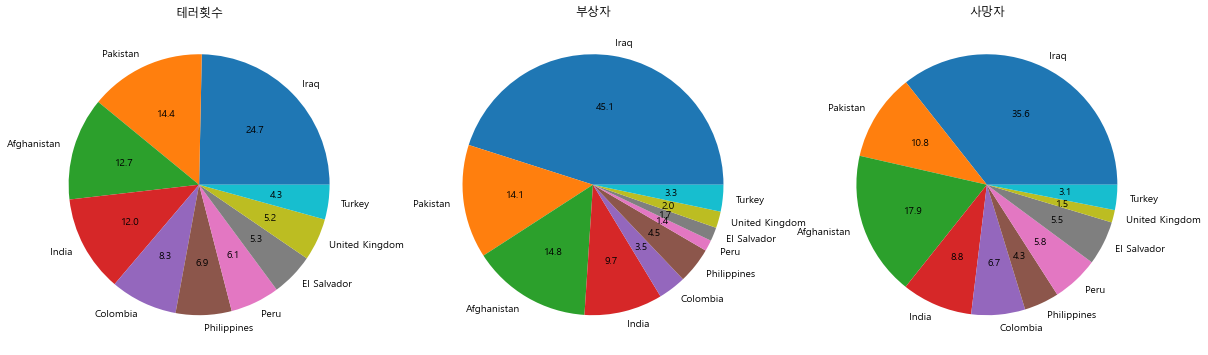

In [18]:
# 대한민국 범죄율 pdf에서 가져온 원 그래프를 그려 테러횟수, 부상자, 사망자를 보여준다.
f, ax = plt.subplots(1,3, figsize=(20,6))

Terror_World_step3_nara['테러횟수'].plot.pie(ax= ax[0], autopct = "%.1f")
ax[0].set_title('테러횟수') 
ax[0].set_ylabel('')

Terror_World_step3_nara['부상자'].plot.pie( ax= ax[1], autopct = "%.1f")
ax[1].set_title('부상자') 
ax[1].set_ylabel('')

Terror_World_step3_nara['사망자'].plot.pie( ax= ax[2], autopct = "%.1f")
ax[2].set_title('사망자') 
ax[2].set_ylabel('')

plt.show()


In [19]:
#보는 것도 중요하지만 테러횟수와 사상자의 관계를 알고 싶다. 그렇기에 사상자 컬럼을 새로 만든다.
Terror_World_step3_nara["사상자"] = Terror_World_step3_nara["사망자"] + Terror_World_step3_nara["부상자"]
Terror_World_step3_nara

,테러횟수,부상자,사망자,사상자
국가,,,,
Iraq,24636,134690.0,78589.0,213279.0
Pakistan,14368,42038.0,23822.0,65860.0
Afghanistan,12731,44277.0,39384.0,83661.0
India,11960,28980.0,19341.0,48321.0
Colombia,8306,10328.0,14698.0,25026.0
Philippines,6908,13367.0,9559.0,22926.0
Peru,6096,4078.0,12771.0,16849.0
El Salvador,5320,5062.0,12053.0,17115.0
United Kingdom,5235,6106.0,3410.0,9516.0


In [20]:
# 테러당 몇명의 사상자가 발생하는지 계산하여 새로운 컬럼으로 추가한다.
Terror_World_step3_nara["평균테러사상자"] = Terror_World_step3_nara["사상자"] / Terror_World_step3_nara["테러횟수"]
a=Terror_World_step3_nara.sort_values(by="평균테러사상자", ascending=False).head(10)
a

,테러횟수,부상자,사망자,사상자,평균테러사상자
국가,,,,,
Iraq,24636,134690.0,78589.0,213279.0,8.657209
Afghanistan,12731,44277.0,39384.0,83661.0,6.571440
Pakistan,14368,42038.0,23822.0,65860.0,4.583797
India,11960,28980.0,19341.0,48321.0,4.040217
Turkey,4292,9899.0,6888.0,16787.0,3.911230
Philippines,6908,13367.0,9559.0,22926.0,3.318761
El Salvador,5320,5062.0,12053.0,17115.0,3.217105
Colombia,8306,10328.0,14698.0,25026.0,3.013003
Peru,6096,4078.0,12771.0,16849.0,2.763944


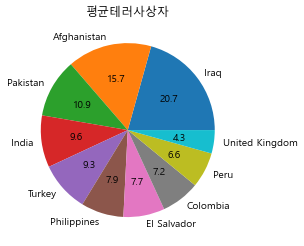

In [21]:
# 그 값을 표현한다.
plt.figure()
a["평균테러사상자"].plot.pie(autopct='%.1f')
plt.ylabel('')
plt.title('평균테러사상자')
plt.show()

- 이라크의 경우 테러 한 번이 발생하면 평균적으로 20명의 사상자가 발생한다.
- 영국의 경우 테러 한 번이 발생하면 평균적으로 4.3명의 사상자가 발생한다.

## step 4. 중동& 북아프리카, 남아시아, 남아메리카, 서유럽 등등 지역으로 구분하여 각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지 확인하세요.

In [22]:
# 이 문제를 풀기 위해 국가, 대륙, 유형, 사망자, 부상자를 가져왔다.
Terror_World_step4 = Terror_World.loc[:, ["country_txt", "region_txt", "attacktype1_txt",  "nkill", "nwound" ]].fillna(0)
Terror_World_step4

,country_txt,region_txt,attacktype1_txt,nkill,nwound
0,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0
1,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0
2,Philippines,Southeast Asia,Assassination,1.0,0.0
3,Greece,Western Europe,Bombing/Explosion,0.0,0.0
4,Japan,East Asia,Facility/Infrastructure Attack,0.0,0.0
...,...,...,...,...,...
181686,Somalia,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,Syria,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,India,South Asia,Bombing/Explosion,0.0,0.0


In [23]:
# 계산 혹은 보여지기 편리하기 위해 컬럼의 이름을 변경한다.
Terror_World_step4.rename(columns={Terror_World_step4.columns[0]: "국가"}, inplace=True)
Terror_World_step4.rename(columns={Terror_World_step4.columns[1]: "지역"}, inplace=True)
Terror_World_step4.rename(columns={Terror_World_step4.columns[2]: "유형"}, inplace=True)
Terror_World_step4.rename(columns={Terror_World_step4.columns[3]: "사망자"}, inplace=True)
Terror_World_step4.rename(columns={Terror_World_step4.columns[4]: "부상자"}, inplace=True)

In [24]:
# 잘 바뀌었는지 확인
Terror_World_step4

,국가,지역,유형,사망자,부상자
0,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0
1,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0
2,Philippines,Southeast Asia,Assassination,1.0,0.0
3,Greece,Western Europe,Bombing/Explosion,0.0,0.0
4,Japan,East Asia,Facility/Infrastructure Attack,0.0,0.0
...,...,...,...,...,...
181686,Somalia,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,Syria,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,India,South Asia,Bombing/Explosion,0.0,0.0


In [25]:
# 이 문제는 사망자와 사상자만 필요하기 때문에 사상자를 하나 만들고 부상자는 삭제했다.
Terror_World_step4["사상자"] = Terror_World_step4["사망자"] + Terror_World_step4["부상자"]
del Terror_World_step4["부상자"]

In [26]:
Terror_World_step4

,국가,지역,유형,사망자,사상자
0,Dominican Republic,Central America & Caribbean,Assassination,1.0,1.0
1,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0
2,Philippines,Southeast Asia,Assassination,1.0,1.0
3,Greece,Western Europe,Bombing/Explosion,0.0,0.0
4,Japan,East Asia,Facility/Infrastructure Attack,0.0,0.0
...,...,...,...,...,...
181686,Somalia,Sub-Saharan Africa,Armed Assault,1.0,3.0
181687,Syria,Middle East & North Africa,Bombing/Explosion,2.0,9.0
181688,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,India,South Asia,Bombing/Explosion,0.0,0.0


In [27]:
#피벗 테이블을 이용해 대륙별 테러유형에 따른 사망,사상자를 데이터프레임으로 나타냈다.
continent_Terror =Terror_World_step4.pivot_table(Terror_World_step4, index=["지역", "유형"],  aggfunc = [np.sum] )
continent_Terror

sum       
                                                             사망자    사상자
지역                    유형                                               
Australasia & Oceania Armed Assault                         78.0  165.0
                      Assassination                         34.0   43.0
                      Bombing/Explosion                      9.0   86.0
                      Facility/Infrastructure Attack         0.0   13.0
                      Hijacking                              0.0    0.0
...                                                          ...    ...
Western Europe        Hijacking                            133.0  199.0
                      Hostage Taking (Barricade Incident)  170.0  559.0
                      Hostage Taking (Kidnapping)           77.0  110.0
                      Unarmed Assault                       53.0  488.0
                      Unknown                               30.0  156.0

[108 rows x 2 columns]

In [28]:
# 계산의 용의함을 위해 멀티인덱스를 단일로 풀어내었다.
continent_Terror.columns = ['/'.join(col) for col in continent_Terror.columns]
continent_Terror  = continent_Terror.reset_index()
continent_Terror

,지역,유형,sum/사망자,sum/사상자
0,Australasia & Oceania,Armed Assault,78.0,165.0
1,Australasia & Oceania,Assassination,34.0,43.0
2,Australasia & Oceania,Bombing/Explosion,9.0,86.0
3,Australasia & Oceania,Facility/Infrastructure Attack,0.0,13.0
4,Australasia & Oceania,Hijacking,0.0,0.0
...,...,...,...,...
103,Western Europe,Hijacking,133.0,199.0
104,Western Europe,Hostage Taking (Barricade Incident),170.0,559.0
105,Western Europe,Hostage Taking (Kidnapping),77.0,110.0
106,Western Europe,Unarmed Assault,53.0,488.0


In [29]:
# 계산 혹은 보여지기 편리하기 위해 컬럼의 이름을 변경한다.
continent_Terror.rename(columns={continent_Terror.columns[2]: "사망자"}, inplace=True)
continent_Terror.rename(columns={continent_Terror.columns[3]: "사상자"}, inplace=True)
continent_Terror

,지역,유형,사망자,사상자
0,Australasia & Oceania,Armed Assault,78.0,165.0
1,Australasia & Oceania,Assassination,34.0,43.0
2,Australasia & Oceania,Bombing/Explosion,9.0,86.0
3,Australasia & Oceania,Facility/Infrastructure Attack,0.0,13.0
4,Australasia & Oceania,Hijacking,0.0,0.0
...,...,...,...,...
103,Western Europe,Hijacking,133.0,199.0
104,Western Europe,Hostage Taking (Barricade Incident),170.0,559.0
105,Western Europe,Hostage Taking (Kidnapping),77.0,110.0
106,Western Europe,Unarmed Assault,53.0,488.0


In [30]:
# 피벗테이블을 이용해 지역별 유형에따른 사망, 사상자를 표시하는 데이터프레임을 작성
continent_Terror =Terror_World_step4.pivot_table(Terror_World_step4, index=["지역"], columns=["유형"],  aggfunc = [np.sum] )
continent_Terror

sum                                  \
                                      사망자                                   
유형                          Armed Assault Assassination Bombing/Explosion   
지역                                                                          
Australasia & Oceania                78.0          34.0               9.0   
Central America & Caribbean       23233.0        1699.0            2611.0   
Central Asia                        400.0         138.0             349.0   
East Asia                           612.0          44.0             398.0   
Eastern Europe                     2046.0         377.0            3725.0   
Middle East & North Africa        26201.0        4774.0           81183.0   
North America                       837.0         238.0             598.0   
South America                     16814.0        4239.0            4318.0   
South Asia                        39132.0        6701.0           41490.0   
Southeast Asia                     7745.0        1632.0            3854.0   
Sub-Saharan Africa                42224.0        2371.0           16261.0   
Western Europe                      975.0        2673.0            2525.0   

                                                                      \
                                                                       
유형                          Facility/Infrastructure Attack Hijacking   
지역                                                                     
Australasia & Oceania                                  0.0       0.0   
Central America & Caribbean                          118.0       4.0   
Central Asia                                           1.0      14.0   
East Asia                                             32.0       9.0   
Eastern Europe                                        33.0      57.0   
Middle East & North Africa                           802.0     124.0   
North America                                         64.0    3005.0   
South America                                        238.0      16.0   
South Asia                                           562.0     142.0   
Southeast Asia                                       150.0     164.0   
Sub-Saharan Africa                                  1584.0      50.0   
Western Europe                                        58.0     133.0   

                                                                 \
                                                                  
유형                          Hostage Taking (Barricade Incident)   
지역                                                                
Australasia & Oceania                                       6.0   
Central America & Caribbean                                59.0   
Central Asia                                                6.0   
East Asia                                                  19.0   
Eastern Europe                                            667.0   
Middle East & North Africa                               1115.0   
North America                                              81.0   
South America                                              36.0   
South Asia                                                795.0   
Southeast Asia                                            224.0   
Sub-Saharan Africa                                       1300.0   
Western Europe                                            170.0   

                                                                         \
                                                                          
유형                          Hostage Taking (Kidnapping) Unarmed Assault   
지역                                                                        
Australasia & Oceania                               7.0             1.0   
Central America & Caribbean                       266.0            23.0   
Central Asia                                       10.0            16.0   
East Asia                                           4.

In [31]:
# 인터넷에서 가져온 최대값만 배경색을 바꾸는 함수
def draw_color_at_maxmum(x,color):
    color = f'background-color:{color}'
    is_max = x == x.max()
    return [color if b else '' for b in is_max]

In [32]:
# 사망자부분만 분리해서 최대값의 배경에 색을 칠한다.
continent_Terror_die = continent_Terror.iloc[:, 0:9]
continent_Terror_die.style.apply(draw_color_at_maxmum,color='#ff9090',axis=1)

### 대륙의  사망자의 통계
- Australasia & Oceania, Central America & Caribbean,Central Asia, East Asia 등의 경우 무장 공격(총기난사?)가 사망자가 많았다.
- Eastern Europ, Middle East & North Africa 등은 Bombing/Explosion(폭탄테러)가 사망자가 많았다.
- Western Europe의 경우 암살이 많았다.
- North America	의 경우 Hijacking(항공기 납치)의 사망자가 많았다.

In [33]:
#이번엔 사상자만 가져와서 최대값에 색을 칠한다.
continent_Terror_injury = continent_Terror.iloc[:, 9:17]
continent_Terror_injury.style.apply(draw_color_at_maxmum,color='#ff9090',axis=1)

### 대륙의 사상자의 통계
- Australasia & Oceania, Central America & Caribbean,Central Asia, South America 등의 경우 무장 공격(테러)가 사상자가 많았다.
- Eastern Europ, Middle East & North Africa, South Asia 등은 Bombing/Explosion(폭탄테러)가 사상자가 많았다.
- East Asia의 경우 비무장 공격의 사상자가 많았다.
- North America	의 경우 Hijacking(항공기 납치)의 사상자가 많았다. -> 
- North Ameria는 항공기납치가 빈번하게 일어나는가? -> 9.11 때문이라 생각된다. 9.11 테러 때문이라면 2001년의 테러 유형을 한 번 확인해보겠다.


In [34]:
Terror_world_why_america = Terror_World[(Terror_World["iyear"] == 2001)]

Terror_world_why_america_2001 = Terror_world_why_america.loc[:, ["country_txt", "region_txt", "attacktype1_txt",  "nkill", "nwound" ]].fillna(0)

Terror_world_why_america_2001.rename(columns={Terror_world_why_america_2001.columns[0]: "국가"}, inplace=True)
Terror_world_why_america_2001.rename(columns={Terror_world_why_america_2001.columns[1]: "지역"}, inplace=True)
Terror_world_why_america_2001.rename(columns={Terror_world_why_america_2001.columns[2]: "유형"}, inplace=True)
Terror_world_why_america_2001.rename(columns={Terror_world_why_america_2001.columns[3]: "사망자"}, inplace=True)
Terror_world_why_america_2001.rename(columns={Terror_world_why_america_2001.columns[4]: "부상자"}, inplace=True)


Terror_world_why_america_2001_pivot =Terror_world_why_america_2001.pivot_table(Terror_world_why_america_2001, index=["지역"], columns=["유형"],  aggfunc = [np.sum] )
Terror_world_why_america_2001_pivot.fillna(0)

sum                                  \
                                      부상자                                   
유형                          Armed Assault Assassination Bombing/Explosion   
지역                                                                          
Australasia & Oceania                 0.0           0.0               0.0   
Central America & Caribbean           0.0           1.0               2.0   
Central Asia                          2.0           0.0              11.0   
East Asia                             0.0           0.0              39.0   
Eastern Europe                       62.0           7.0             468.0   
Middle East & North Africa          289.0           4.0            1108.0   
North America                         3.0           0.0               2.0   
South America                        23.0          11.0             383.0   
South Asia                          373.0          19.0            1806.0   
Southeast Asia                       99.0          12.0             373.0   
Sub-Saharan Africa                  419.0           1.0             104.0   
Western Europe                       30.0           8.0             215.0   

                                                                      \
                                                                       
유형                          Facility/Infrastructure Attack Hijacking   
지역                                                                     
Australasia & Oceania                                  0.0       0.0   
Central America & Caribbean                            0.0       0.0   
Central Asia                                           7.0       0.0   
East Asia                                             18.0       0.0   
Eastern Europe                                         1.0       0.0   
Middle East & North Africa                             2.0       2.0   
North America                                          0.0   16493.0   
South America                                         17.0       0.0   
South Asia                                            56.0       0.0   
Southeast Asia                                         7.0       2.0   
Sub-Saharan Africa                                    34.0       0.0   
Western Europe                                         3.0       0.0   

                                                                 \
                                                                  
유형                          Hostage Taking (Barricade Incident)   
지역                                                                
Australasia & Oceania                                       0.0   
Central America & Caribbean                                 0.0   
Central Asia                                                0.0   
East Asia                                                   0.0   
Eastern Europe                                              2.0   
Middle East & North Africa                                  0.0   
North America                                               0.0   
South America                                               0.0   
South Asia                                                  0.0   
Southeast Asia                                             41.0   
Sub-Saharan Africa                                          0.0   
Western Europe                                              0.0   

                                                                         \
                                                                          
유형                          Hostage Taking (Kidnapping) Unarmed Assault   
지역                                                                        
Australasia & Oceania                               0.0             0.0   
Central America & Caribbean                         0.0             0.0   
Central Asia                                        0.0             7.0   
East Asia                                           0.

- 2001년의 Hijacking 사고만 보았을 때 North America의 부상자가 16493명, 사망자가 3001명이다.
- 전체기간의 Hijacking 사망자가 3005명 사상자가 16,512(19517-3005)명일 때 
- 그래서 전체기간의 테러유형을 볼 때, North America의 Hijacking 사상자가 많았던 이유는 2001년의 9.11테러 때문이다.

## Step 5. 중동,북아메리카, 남아시아 등 지역으로 구분하여 진행한 문제 4번에 대해 문제 1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해보시오.

- 2011~2012년 테러가 급증하던 시기에 테러의 양상을 분석해보세요. 

In [35]:
#원본 데이터를 가공해서 2011년~2012년 데이터만 뽑아내자.

In [36]:
Terror_world2 = Terror_World[(Terror_World["iyear"] == 2012) | (Terror_World["iyear"] == 2013)  ]

In [37]:
#데이터 가공을 완료하고, step 4에서 진행한 내용을 복사 붙여넣기하여 빠르게 지나가도록 하겠습니다.
Terror_World_step5 = Terror_world2.loc[:, ["country_txt", "region_txt", "attacktype1_txt",  "nkill", "nwound" ]].fillna(0)

Terror_World_step5.rename(columns={Terror_World_step5.columns[0]: "국가"}, inplace=True)
Terror_World_step5.rename(columns={Terror_World_step5.columns[1]: "지역"}, inplace=True)
Terror_World_step5.rename(columns={Terror_World_step5.columns[2]: "유형"}, inplace=True)
Terror_World_step5.rename(columns={Terror_World_step5.columns[3]: "사망자"}, inplace=True)
Terror_World_step5.rename(columns={Terror_World_step5.columns[4]: "부상자"}, inplace=True)

Terror_World_step5["사상자"] = Terror_World_step5["사망자"] + Terror_World_step5["부상자"]
del Terror_World_step5["부상자"]

whathappen_2012_3 =Terror_World_step5.pivot_table(Terror_World_step5, index=["지역", "유형"],  aggfunc = [np.sum] )
whathappen_2012_3

sum     
                                                                 사망자  사상자
지역                          유형                                           
Australasia & Oceania       Facility/Infrastructure Attack       0.0  0.0
Central America & Caribbean Armed Assault                        6.0  6.0
                            Assassination                        5.0  9.0
                            Bombing/Explosion                    0.0  0.0
                            Facility/Infrastructure Attack       0.0  0.0
...                                                              ...  ...
Western Europe              Hijacking                            0.0  0.0
                            Hostage Taking (Barricade Incident)  0.0  3.0
                            Hostage Taking (Kidnapping)          0.0  1.0
                            Unarmed Assault                      0.0  5.0
                            Unknown                              0.0  0.0

[80 rows x 2 columns]

In [38]:
#step 4에서 했던 과정을 반복하고 있다.
whathappen_2012_3.columns = ['/'.join(col) for col in whathappen_2012_3.columns]
whathappen_2012_3  = whathappen_2012_3.reset_index()

whathappen_2012_3.rename(columns={whathappen_2012_3.columns[2]: "사망자"}, inplace=True)
whathappen_2012_3.rename(columns={whathappen_2012_3.columns[3]: "사상자"}, inplace=True)

whathappen_2012_3 =whathappen_2012_3.pivot_table(whathappen_2012_3, index=["지역"], columns=["유형"],  aggfunc = [np.sum] ).fillna(0)
whathappen_2012_3

sum                                  \
                                      사망자                                   
유형                          Armed Assault Assassination Bombing/Explosion   
지역                                                                          
Australasia & Oceania                 0.0           0.0               0.0   
Central America & Caribbean           6.0           5.0               0.0   
Central Asia                          2.0           6.0               0.0   
East Asia                            81.0           0.0               5.0   
Eastern Europe                      126.0          17.0             183.0   
Middle East & North Africa         3110.0         424.0           10774.0   
North America                        26.0           4.0               3.0   
South America                       121.0          10.0             170.0   
South Asia                         4695.0         602.0            7131.0   
Southeast Asia                      638.0         136.0             329.0   
Sub-Saharan Africa                 3736.0         185.0            1868.0   
Western Europe                       17.0           0.0               0.0   

                                                                      \
                                                                       
유형                          Facility/Infrastructure Attack Hijacking   
지역                                                                     
Australasia & Oceania                                  0.0       0.0   
Central America & Caribbean                            0.0       0.0   
Central Asia                                           0.0       0.0   
East Asia                                              0.0       0.0   
Eastern Europe                                         0.0       0.0   
Middle East & North Africa                            21.0       0.0   
North America                                         52.0       2.0   
South America                                          0.0       0.0   
South Asia                                            50.0       6.0   
Southeast Asia                                        11.0       0.0   
Sub-Saharan Africa                                    92.0       5.0   
Western Europe                                         1.0       0.0   

                                                                 \
                                                                  
유형                          Hostage Taking (Barricade Incident)   
지역                                                                
Australasia & Oceania                                       0.0   
Central America & Caribbean                                 0.0   
Central Asia                                                0.0   
East Asia                                                   0.0   
Eastern Europe                                              0.0   
Middle East & North Africa                                175.0   
North America                                               0.0   
South America                                               0.0   
South Asia                                                 66.0   
Southeast Asia                                              5.0   
Sub-Saharan Africa                                         81.0   
Western Europe                                              0.0   

                                                                         \
                                                                          
유형                          Hostage Taking (Kidnapping) Unarmed Assault   
지역                                                                        
Australasia & Oceania                               0.0             0.0   
Central America & Caribbean                         0.0             0.0   
Central Asia                                        0.0             0.0   
East Asia                                           0.

In [39]:
# sort를 해야하는데, 멀티인덱스 환경이라 방법을 몰라 풀어내었다.
whathappen_2012_3_die = whathappen_2012_3.iloc[:, 0:9]
whathappen_2012_3_die.columns = ['/'.join(col) for col in whathappen_2012_3_die.columns]
whathappen_2012_3_die

,sum/사망자/Armed Assault,sum/사망자/Assassination,sum/사망자/Bombing/Explosion,sum/사망자/Facility/Infrastructure Attack,sum/사망자/Hijacking,sum/사망자/Hostage Taking (Barricade Incident),sum/사망자/Hostage Taking (Kidnapping),sum/사망자/Unarmed Assault,sum/사망자/Unknown
지역,,,,,,,,,
Australasia & Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Central America & Caribbean,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Central Asia,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
East Asia,81.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
Eastern Europe,126.0,17.0,183.0,0.0,0.0,0.0,4.0,0.0,0.0
Middle East & North Africa,3110.0,424.0,10774.0,21.0,0.0,175.0,450.0,1.0,242.0
North America,26.0,4.0,3.0,52.0,2.0,0.0,7.0,0.0,0.0
South America,121.0,10.0,170.0,0.0,0.0,0.0,27.0,0.0,12.0
South Asia,4695.0,602.0,7131.0,50.0,6.0,66.0,588.0,6.0,512.0


In [40]:
# sort를 진행하였다.
whathappen_2012_3_die.sort_values(by="sum/사망자/Armed Assault", ascending=False)

,sum/사망자/Armed Assault,sum/사망자/Assassination,sum/사망자/Bombing/Explosion,sum/사망자/Facility/Infrastructure Attack,sum/사망자/Hijacking,sum/사망자/Hostage Taking (Barricade Incident),sum/사망자/Hostage Taking (Kidnapping),sum/사망자/Unarmed Assault,sum/사망자/Unknown
지역,,,,,,,,,
South Asia,4695.0,602.0,7131.0,50.0,6.0,66.0,588.0,6.0,512.0
Sub-Saharan Africa,3736.0,185.0,1868.0,92.0,5.0,81.0,397.0,3.0,486.0
Middle East & North Africa,3110.0,424.0,10774.0,21.0,0.0,175.0,450.0,1.0,242.0
Southeast Asia,638.0,136.0,329.0,11.0,0.0,5.0,29.0,0.0,28.0
Eastern Europe,126.0,17.0,183.0,0.0,0.0,0.0,4.0,0.0,0.0
South America,121.0,10.0,170.0,0.0,0.0,0.0,27.0,0.0,12.0
East Asia,81.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
North America,26.0,4.0,3.0,52.0,2.0,0.0,7.0,0.0,0.0
Western Europe,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 결론 :  2011~2012년도에 테러는 남아시아, 사하라 이남 아프리카, 중동아시아 혹은 북아프리카, 동남아시아에서 테러가 발생했다.
- 1번에서 가정한 sns의 발전으로 이슬람 극단주의자들이 성장하여 테러가 증가하였다. 라는 가설을 검증하기 위해 세계에서 이슬람의 영향권을 확인해봐야겠다.
- http://news.kmib.co.kr/article/view.asp?arcid=0923143410&code=11141300&sid1=spo?
- 지도를 확인해보았을 때, 이슬람의 영향권과 테러가 일어난 지역이 겹치는 것으로 보아 이슬람 극단주의자들의 영향으로 2012~2013년 전세계 테러횟수가 증가하였다고 결론 내릴 수 있겠다

## Step 6. 테러의 위험성을 알릴 수 있는 효과적인 시각화 방법을 고민해보시오. 
- 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.
- 전세계 사망자 중에서 테러로 사망하는 사람은 얼마나 될까?
- https://data.worldbank.org/indicator/SP.DYN.CDRT.IN 해당 사이트에서 1000명당 사망률 통계를 받아왔다.

In [41]:
death_rate = pd.read_csv("./death_rate.csv", encoding="ISO-8859-1").fillna(0)
death_rate

,ï»¿Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,6.388000,6.241000,6.118000,6.012000,5.920000,5.839000,5.77000,5.716000,5.682000,...,8.061000,8.20500,8.347000,8.488000,8.627000,8.765000,8.907000,9.053000,9.205000,9.362000
1,Africa Eastern and Southern,22.016422,21.639101,21.275962,20.934113,20.600616,20.284970,19.97816,19.673194,19.376809,...,9.561199,9.13893,8.757960,8.422274,8.133776,7.893734,7.691457,7.521438,7.376644,7.250956
2,Afghanistan,32.219000,31.649000,31.093000,30.551000,30.022000,29.501000,28.98500,28.468000,27.946000,...,7.936000,7.64500,7.380000,7.141000,6.929000,6.742000,6.575000,6.423000,6.285000,6.157000
3,Africa Western and Central,26.671409,26.265887,25.870773,25.486606,25.112658,24.747503,24.38891,24.033105,23.676167,...,12.143970,11.81812,11.503546,11.201067,10.912662,10.642471,10.393638,10.166492,9.960843,9.774668
4,Angola,27.097000,26.859000,26.627000,26.407000,26.194000,25.966000,25.69000,25.342000,24.916000,...,11.039000,10.45100,9.921000,9.454000,9.052000,8.716000,8.432000,8.190000,7.981000,7.798000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.100000,7.10000,7.100000,7.100000,7.100000,7.000000,6.900000,6.900000,6.800000,8.000000
262,"Yemen, Rep.",36.234000,36.031000,35.732000,35.321000,34.790000,34.136000,33.36500,32.500000,31.563000,...,6.094000,6.03000,5.992000,5.974000,5.969000,5.972000,5.978000,5.983000,5.983000,5.976000
263,South Africa,17.398000,17.104000,16.816000,16.527000,16.233000,15.930000,15.61400,15.287000,14.952000,...,11.483000,10.91800,10.430000,10.044000,9.769000,9.599000,9.498000,9.435000,9.398000,9.375000
264,Zambia,18.471000,18.191000,17.931000,17.689000,17.462000,17.241000,17.01200,16.768000,16.504000,...,9.304000,8.63700,8.055000,7.565000,7.169000,6.864000,6.633000,6.456000,6.321000,6.216000


In [42]:
death_rate = death_rate.sum().to_frame()
death_rate 


,0
ï»¿Country Name,ArubaAfrica Eastern and SouthernAfghanistanAfr...
1960,3959.986092
1961,3808.911362
1962,3736.567052
1963,3653.318722
...,...
2016,1952.263624
2017,1933.444859
2018,1924.906478
2019,1914.635289


In [43]:
death_rate_frame = death_rate.iloc[11:59]
death_rate_frame.rename(columns={death_rate_frame.columns[0]: "사망자"}, inplace=True)

death_rate_frame_real = death_rate_frame['사망자']*1000
death_frame=death_rate_frame_real.to_frame()
death_frame

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7832\1699202388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_frame.rename(columns={death_rate_frame.columns[0]: "사망자"}, inplace=True)


,사망자
1970,3252337.967385
1971,3186910.873837
1972,3134993.236826
1973,3089204.818513
1974,3044315.777069
1975,3004512.980385
1976,2980585.288606
1977,2933743.469371
1978,2887211.50972
1979,2832922.702131


In [44]:
Terror_death = Terror_World.loc[:, ["iyear", "nkill"]].fillna(0)
Terror_death = Terror_death.pivot_table(Terror_death, index=["iyear"], aggfunc = [np.sum] )
Terror_death.columns = ['/'.join(col) for col in Terror_death.columns]
Terror_death.rename(columns={Terror_death.columns[0]: "테러사망자"}, inplace=True)
Terror_death

,테러사망자
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


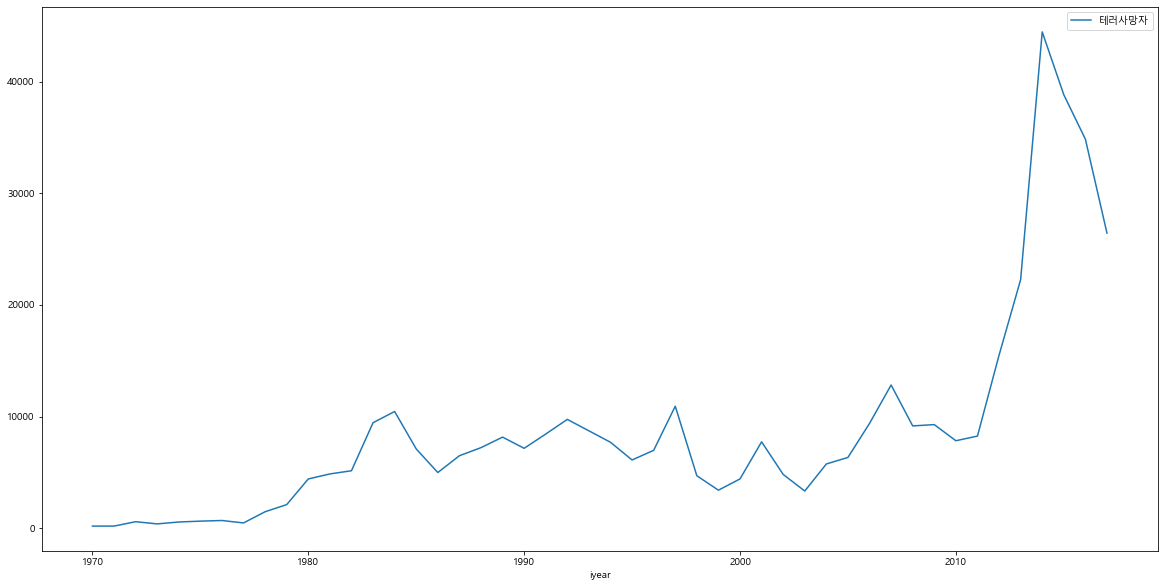

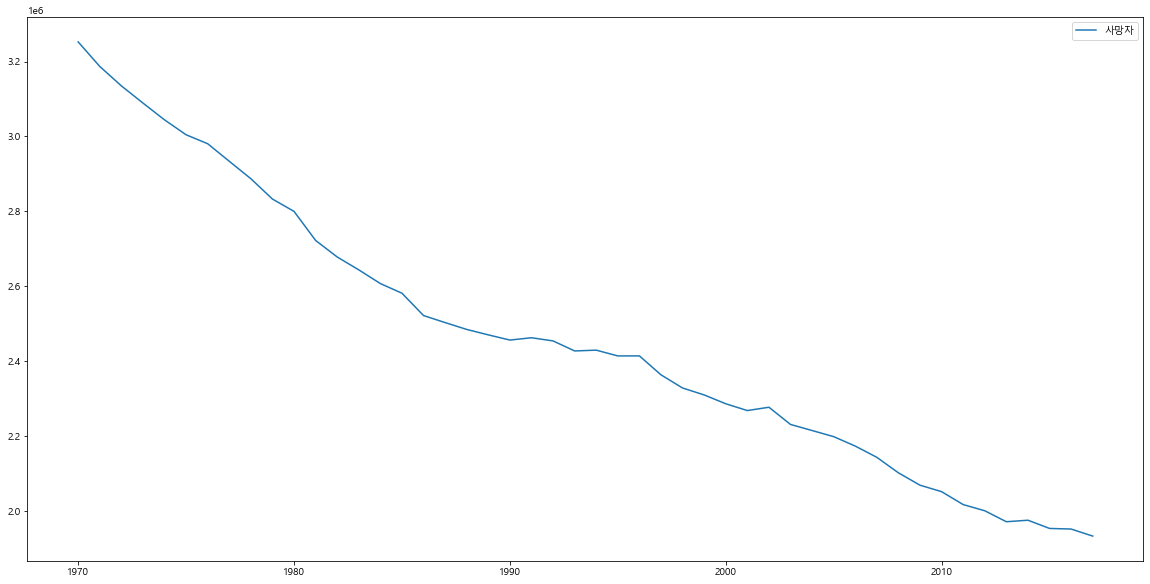

In [45]:
Terror_death[['테러사망자']].plot(figsize=(20,10))
death_frame[['사망자']].plot(figsize=(20,10))
plt.show()